In [1]:
# Kütüphaneleri Import Et
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib
from matplotlib import pyplot as plt
from tensorflow import keras
from pandas import ExcelWriter
from pandas import ExcelFile
from tensorflow.keras import datasets, layers, models

In [2]:
#Veriyi İçeri Akter
train_data = pd.read_excel("data/train.xls")
train_data.head()

,ACC_N,ACC_C,ACC_I,RT_N,RT_C,RT_I,GE_N,GE_C,GE_I,GED_N,...,R_N,R_C,R_I,NCI_N,NCI_C,NCI_I,NCR_N,NCR_C,NCR_I,CASE
0,96.666667,96.666667,96.666667,0.719383,0.815559,0.865545,0.312500,0.298611,0.251389,0.150694,...,2.073733,1.228571,1.220078,41.992017,35.393827,28.075872,278.656705,145.620317,136.261987,Control
1,93.333333,96.666667,100.000000,0.800932,0.785466,0.817040,0.371895,0.424524,0.355694,0.166181,...,2.237896,1.986630,1.855125,43.337236,52.245835,43.534520,260.784035,244.493043,227.054361,Control
2,100.000000,100.000000,93.333333,1.155340,1.191243,1.497596,0.212500,0.401944,0.375000,0.138472,...,1.534604,2.062303,4.778761,18.392854,33.741590,23.370782,132.827030,173.121872,297.822358,Control
3,96.666667,83.333333,76.666667,0.875600,0.827616,0.881861,0.302083,0.431806,0.331944,0.092361,...,3.270677,2.292531,1.402582,33.350147,43.478855,28.858378,361.084301,230.836859,121.936807,Control
4,100.000000,100.000000,86.666667,1.086340,1.028857,1.280985,0.297222,0.366528,0.325556,0.202361,...,1.468771,1.713636,1.251468,27.359963,35.624766,22.025881,135.203661,166.557347,84.669698,Control


In [3]:
train_features = train_data.copy()

In [4]:
# Veri Ön İşleme
train_features = train_data.copy()
train_labels = train_features.pop('CASE')
labels=[]
for i in range(len(train_labels)):
    if train_labels[i]=="Control":
        data = [1,0]
        labels.append(data)
    elif train_labels[i]=="Migraine":
        data = [0, 1]
        labels.append(data)
    elif train_labels[i]=="OCD":
        data = [0, 1]
        labels.append(data)
    elif train_labels[i]=="Schizo":
        data = [0, 1]
        labels.append(data)
len(labels)

76

In [5]:
labels = np.array(labels)
labels

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0,

In [6]:
train_features = np.array(train_features)
train_features

array([[ 96.66666667,  96.66666667,  96.66666667, ..., 278.65670548,
        145.62031686, 136.26198677],
       [ 93.33333333,  96.66666667, 100.        , ..., 260.78403528,
        244.49304267, 227.05436144],
       [100.        , 100.        ,  93.33333333, ..., 132.82703026,
        173.12187201, 297.82235762],
       ...,
       [ 96.66666667, 100.        ,  93.33333333, ...,  61.48224376,
         26.26319397,  29.46968284],
       [ 96.66666667,  96.66666667,  50.        , ...,  63.77320007,
         45.09098421,  10.74684427],
       [100.        , 100.        ,  90.        , ...,  43.44274236,
         30.00044517,  24.12611682]])

In [7]:
test_data = pd.read_excel("data/test.xls")
test_data.head()

,ACC_N,ACC_C,ACC_I,RT_N,RT_C,RT_I,GE_N,GE_C,GE_I,GED_N,...,R_N,R_C,R_I,NCI_N,NCI_C,NCI_I,NCR_N,NCR_C,NCR_I,CASE
0,96.666667,96.666667,93.333333,0.893475,0.895562,1.057679,0.351667,0.304861,0.309722,0.144940,...,2.426283,1.870359,1.403945,38.047449,32.906605,27.330995,262.503960,201.885928,123.889147,Control
1,76.666667,96.666667,56.666667,1.642448,1.502569,2.332329,0.393194,0.248611,0.277083,0.224931,...,1.748070,1.016179,1.014751,18.353647,15.994213,6.732063,81.596948,65.375152,24.654555,Migraine
2,100.000000,96.666667,100.000000,1.219270,1.337138,1.515313,0.259514,0.276111,0.281042,0.227083,...,1.142813,1.456410,1.045736,21.284366,19.961098,18.546769,93.729318,105.289306,69.011234,OCD
3,100.000000,70.000000,80.000000,1.798820,2.050367,2.162617,0.210556,0.177222,0.152083,0.216667,...,0.971795,1.149550,0.598361,11.705204,6.050408,5.625901,54.024020,39.245892,22.134691,Schizo


In [8]:
test_features = test_data.copy()
test_labels = test_features.pop('CASE')

In [9]:

testing_labels=[]
for i in range(len(test_labels)):
    if test_labels[i]=="Control":
        data = [1, 0]
        testing_labels.append(data)
    elif test_labels[i]=="Migraine":
        data = [0, 1]
        testing_labels.append(data)
    elif test_labels[i]=="OCD":
        data = [0, 1]
        testing_labels.append(data)
    elif test_labels[i]=="Schizo":
        data = [0, 1]
        testing_labels.append(data)
len(testing_labels)

4

In [10]:
testing_labels = np.array(testing_labels)
testing_labels

array([[1, 0],
       [0, 1],
       [0, 1],
       [0, 1]])

In [11]:
test_features = np.array(test_features)
test_features

array([[9.66666667e+01, 9.66666667e+01, 9.33333333e+01, 8.93475000e-01,
        8.95562069e-01, 1.05767857e+00, 3.51666667e-01, 3.04861111e-01,
        3.09722222e-01, 1.44940476e-01, 1.62996032e-01, 2.20608466e-01,
        2.42628337e+00, 1.87035910e+00, 1.40394532e+00, 3.80474489e+01,
        3.29066052e+01, 2.73309947e+01, 2.62503960e+02, 2.01885928e+02,
        1.23889147e+02],
       [7.66666667e+01, 9.66666667e+01, 5.66666667e+01, 1.64244783e+00,
        1.50256897e+00, 2.33232941e+00, 3.93194444e-01, 2.48611111e-01,
        2.77083333e-01, 2.24930556e-01, 2.44652778e-01, 2.73055556e-01,
        1.74807039e+00, 1.01617939e+00, 1.01475076e+00, 1.83536469e+01,
        1.59942126e+01, 6.73206315e+00, 8.15969481e+01, 6.53751521e+01,
        2.46545548e+01],
       [1.00000000e+02, 9.66666667e+01, 1.00000000e+02, 1.21927000e+00,
        1.33713793e+00, 1.51531333e+00, 2.59513889e-01, 2.76111111e-01,
        2.81041667e-01, 2.27083333e-01, 1.89583333e-01, 2.68750000e-01,
        1.1428

In [19]:
#Model Tanımı
input_shape= (21)#Bu değişemez
epochs=240
batch_size=64
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Dense(8, activation="relu"),
        keras.layers.Dense(16, activation="relu"),
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(2, activation="softmax")
    ]
)
model.summary()


# Eğitiim
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(train_features, labels, batch_size=batch_size, epochs=epochs)

# Kaydet
model.save("model/the_kid_binary.h5")


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 8)                 176       
_________________________________________________________________
dense_13 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_14 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_15 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_16 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 2)                

76/76 [==============================] - 0s 206us/sample - loss: 0.1269 - accuracy: 0.9474
Epoch 61/240
76/76 [==============================] - 0s 560us/sample - loss: 0.1231 - accuracy: 0.9342
Epoch 62/240
76/76 [==============================] - 0s 357us/sample - loss: 0.1057 - accuracy: 0.9474
Epoch 63/240
76/76 [==============================] - 0s 126us/sample - loss: 0.0976 - accuracy: 0.9605
Epoch 64/240
76/76 [==============================] - 0s 174us/sample - loss: 0.1157 - accuracy: 0.9474
Epoch 65/240
76/76 [==============================] - 0s 144us/sample - loss: 0.1008 - accuracy: 0.9474
Epoch 66/240
76/76 [==============================] - 0s 167us/sample - loss: 0.1029 - accuracy: 0.9605
Epoch 67/240
76/76 [==============================] - 0s 253us/sample - loss: 0.1207 - accuracy: 0.9605
Epoch 68/240
76/76 [==============================] - 0s 137us/sample - loss: 0.0740 - accuracy: 0.9605
Epoch 69/240
76/76 [==============================] - 0s 137us/sample - loss:

76/76 [==============================] - 0s 88us/sample - loss: 0.0498 - accuracy: 0.9868
Epoch 139/240
76/76 [==============================] - 0s 90us/sample - loss: 0.0571 - accuracy: 0.9737
Epoch 140/240
76/76 [==============================] - 0s 97us/sample - loss: 0.0545 - accuracy: 0.9868
Epoch 141/240
76/76 [==============================] - 0s 108us/sample - loss: 0.0611 - accuracy: 0.9737
Epoch 142/240
76/76 [==============================] - 0s 133us/sample - loss: 0.0650 - accuracy: 0.9605
Epoch 143/240
76/76 [==============================] - 0s 83us/sample - loss: 0.0345 - accuracy: 1.0000
Epoch 144/240
76/76 [==============================] - 0s 114us/sample - loss: 0.0438 - accuracy: 0.9868
Epoch 145/240
76/76 [==============================] - 0s 114us/sample - loss: 0.0581 - accuracy: 0.9737
Epoch 146/240
76/76 [==============================] - 0s 121us/sample - loss: 0.0334 - accuracy: 0.9868
Epoch 147/240
76/76 [==============================] - 0s 101us/sample - 

76/76 [==============================] - 0s 89us/sample - loss: 0.0237 - accuracy: 1.0000
Epoch 217/240
76/76 [==============================] - 0s 188us/sample - loss: 0.0256 - accuracy: 0.9868
Epoch 218/240
76/76 [==============================] - 0s 82us/sample - loss: 0.0227 - accuracy: 1.0000
Epoch 219/240
76/76 [==============================] - 0s 90us/sample - loss: 0.0318 - accuracy: 0.9868
Epoch 220/240
76/76 [==============================] - 0s 88us/sample - loss: 0.0300 - accuracy: 0.9737
Epoch 221/240
76/76 [==============================] - 0s 66us/sample - loss: 0.0273 - accuracy: 0.9868
Epoch 222/240
76/76 [==============================] - 0s 103us/sample - loss: 0.0214 - accuracy: 1.0000
Epoch 223/240
76/76 [==============================] - 0s 75us/sample - loss: 0.0267 - accuracy: 1.0000
Epoch 224/240
76/76 [==============================] - 0s 78us/sample - loss: 0.0244 - accuracy: 1.0000
Epoch 225/240
76/76 [==============================] - 0s 121us/sample - los

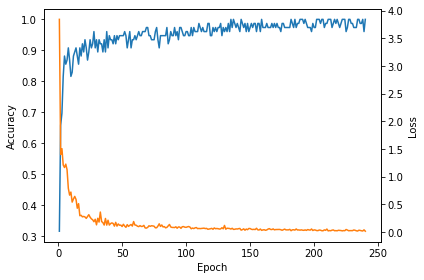

In [20]:
fig, ax1 = plt.subplots()
epoch = np.arange(1, 241, 1)

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.plot(epoch, history.history['accuracy'])
ax1.tick_params(axis='y')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax2.set_ylabel('Loss')  # we already handled the x-label with ax1
ax2.plot(epoch, history.history['loss'], color = color)
ax2.tick_params(axis='y')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [14]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [21]:
prediction=model.predict(test_features)

In [22]:
prediction

array([[9.9997616e-01, 2.3781748e-05],
       [3.5835812e-09, 1.0000000e+00],
       [2.9048153e-05, 9.9997091e-01],
       [9.3920323e-07, 9.9999905e-01]], dtype=float32)

In [23]:
testing_labels

array([[1, 0],
       [0, 1],
       [0, 1],
       [0, 1]])